USED CAR PRICE PREDICTION

Web Scraping data from Cars24

In [4]:
from bs4 import BeautifulSoup as bs
from selenium import webdriver

driver = webdriver.Chrome()
driver.get("https://checkcars24.de/home?srsltid=AfmBOooRw83m6TdMtYMWnKgE_ZT47HDtfMb_-2fHPw2AADdd3ibfyg-n")

html = driver.page_source
soup = bs(html, "html.parser")

car_cards = soup.select("check-vehicle-card")

In [6]:
cars = []
for card in car_cards:
    title_tag = card.find("h3")
    variant_tag = card.find("p", class_="text-sm")
    price_tag = card.select_one("span.text-primary.font-medium.text-4xl")
    features_tag = card.find("p", class_="line-clamp-2")
    details_tags = card.find_all("p", class_="text-[#4B4B4B]")

    car_data = {
        "title": title_tag.get_text(strip=True) if title_tag else None,
        "variant": variant_tag.get_text(strip=True) if variant_tag else None,
        "price": price_tag.get_text(strip=True) if price_tag else None,
        "features": features_tag.get_text(strip=True) if features_tag else None,
        "details": [p.get_text(strip=True) for p in details_tags] if details_tags else []
    }
    cars.append(car_data)

print(cars)

[{'title': 'VW ID.3', 'variant': 'Pro Elektro', 'price': '199\xa0€', 'features': 'Digital Cockpit, PDC + Kamera, LM 18 Zoll, Lane Assist, Sitzheizung, ACC', 'details': ['Pro Elektro', '03/2024 • Elektro', '15251kM • 150kW 204 PS']}, {'title': 'VW ID.5', 'variant': 'GTX Elektro', 'price': '299\xa0€', 'features': 'Navi „Discover Pro", Parkassist + Kamera, Panoramadach, ID.Light, ACC, SHZ, AHK', 'details': ['GTX Elektro', '06/2024 • Elektro', '13296kM • 220kW 299 PS']}, {'title': 'VW ID.4', 'variant': 'GTX Elektro 4Motion', 'price': '239\xa0€', 'features': 'Navi Discover Media, Panoramadach, LM 21 Zoll, Drive Mode, IQ.Light, ACC, SHZ, Kamera', 'details': ['GTX Elektro 4Motion', '07/2023 • Elektro', '38337kM • 220kW 299 PS']}, {'title': 'Cupra Born', 'variant': 'Elektro', 'price': '199\xa0€', 'features': 'Cupra Super Lenkrad, Lane / Front Assist, Cupra Connect Plus, Virtual Cockpit, Voll-LED, PDC', 'details': ['Elektro', '08/2023 • Elektro', '16119kM • 170kW 231 PS']}, {'title': 'Audi E-Tr

In [7]:
import pandas as pd

df1 = pd.DataFrame(cars)

In [8]:
df1.head()

,title,variant,price,features,details
0,VW ID.3,Pro Elektro,199 €,"Digital Cockpit, PDC + Kamera, LM 18 Zoll, Lan...","[Pro Elektro, 03/2024 • Elektro, 15251kM • 150..."
1,VW ID.5,GTX Elektro,299 €,"Navi „Discover Pro"", Parkassist + Kamera, Pano...","[GTX Elektro, 06/2024 • Elektro, 13296kM • 220..."
2,VW ID.4,GTX Elektro 4Motion,239 €,"Navi Discover Media, Panoramadach, LM 21 Zoll,...","[GTX Elektro 4Motion, 07/2023 • Elektro, 38337..."
3,Cupra Born,Elektro,199 €,"Cupra Super Lenkrad, Lane / Front Assist, Cupr...","[Elektro, 08/2023 • Elektro, 16119kM • 170kW 2..."
4,Audi E-Tron,Advanced 55 e-tron Quattro,299 €,"El. Heckklappe, Kamera + Parkassist, Audi Conn...","[Advanced 55 e-tron Quattro, 05/2023 • Elektro..."


In [9]:
df1.shape

(90, 5)

Cleaning The Dataset

In [10]:
df1[['Brand', 'Model']] = df1['title'].str.split(' ', n=1, expand=True)

In [11]:
df1.drop("title",axis=1)
df1['Brand'] = df1['Brand'].replace('VW', 'Volkswagen')

df1.head()
print(df1.loc[10])

full_details = df1.loc[1, 'details']
print(full_details)

title                                                 Audi Q3
variant                             Sportback 40 TFSI Quattro
price                                                   239 €
features    Kamera + Park Assist, Virtual Cockpit Plus, Te...
details     [Sportback 40 TFSI Quattro, 05/2023 • Benzin, ...
Brand                                                    Audi
Model                                                      Q3
Name: 10, dtype: object
['GTX Elektro', '06/2024 • Elektro', '13296kM • 220kW 299 PS']


Split the details into Variant,registration and Mileage

In [12]:

df1[['Variant', 'Registration', 'Mileage_km_kW_PS']] = pd.DataFrame(df1['details'].tolist(), index=df1.index)


Split Registration into MonthYear and Fueltype

In [13]:
# Split by '•' into two columns
df1[['MonthYear', 'FuelType']] = df1['Registration'].str.split(' • ', expand=True)

Extract Year from MonthYear

In [14]:
df1["Year"] = df1["MonthYear"].str.extract(r"(?<=/)(\d{4})")

In [15]:
df1["Kilometers_Driven"] = df1["Mileage_km_kW_PS"].str.extract(r"(\d+)\s*kM")

df1["Engine"] = df1["Mileage_km_kW_PS"].str.extract(r"(\d+)\s*kW")

In [16]:
df1.head()

,title,variant,price,features,details,Brand,Model,Variant,Registration,Mileage_km_kW_PS,MonthYear,FuelType,Year,Kilometers_Driven,Engine
0,VW ID.3,Pro Elektro,199 €,"Digital Cockpit, PDC + Kamera, LM 18 Zoll, Lan...","[Pro Elektro, 03/2024 • Elektro, 15251kM • 150...",Volkswagen,ID.3,Pro Elektro,03/2024 • Elektro,15251kM • 150kW 204 PS,03/2024,Elektro,2024,15251,150
1,VW ID.5,GTX Elektro,299 €,"Navi „Discover Pro"", Parkassist + Kamera, Pano...","[GTX Elektro, 06/2024 • Elektro, 13296kM • 220...",Volkswagen,ID.5,GTX Elektro,06/2024 • Elektro,13296kM • 220kW 299 PS,06/2024,Elektro,2024,13296,220
2,VW ID.4,GTX Elektro 4Motion,239 €,"Navi Discover Media, Panoramadach, LM 21 Zoll,...","[GTX Elektro 4Motion, 07/2023 • Elektro, 38337...",Volkswagen,ID.4,GTX Elektro 4Motion,07/2023 • Elektro,38337kM • 220kW 299 PS,07/2023,Elektro,2023,38337,220
3,Cupra Born,Elektro,199 €,"Cupra Super Lenkrad, Lane / Front Assist, Cupr...","[Elektro, 08/2023 • Elektro, 16119kM • 170kW 2...",Cupra,Born,Elektro,08/2023 • Elektro,16119kM • 170kW 231 PS,08/2023,Elektro,2023,16119,170
4,Audi E-Tron,Advanced 55 e-tron Quattro,299 €,"El. Heckklappe, Kamera + Parkassist, Audi Conn...","[Advanced 55 e-tron Quattro, 05/2023 • Elektro...",Audi,E-Tron,Advanced 55 e-tron Quattro,05/2023 • Elektro,35279kM • 300kW 408 PS,05/2023,Elektro,2023,35279,300


In [17]:
df1.drop(["title","variant","Variant","features","details","Registration","Mileage_km_kW_PS","MonthYear",],axis=1,inplace=True)
df1.head()

,price,Brand,Model,FuelType,Year,Kilometers_Driven,Engine
0,199 €,Volkswagen,ID.3,Elektro,2024,15251,150
1,299 €,Volkswagen,ID.5,Elektro,2024,13296,220
2,239 €,Volkswagen,ID.4,Elektro,2023,38337,220
3,199 €,Cupra,Born,Elektro,2023,16119,170
4,299 €,Audi,E-Tron,Elektro,2023,35279,300


In [18]:
df1["FuelType"] = df1["FuelType"].replace("Elektro","Electric")
df1["FuelType"] = df1["FuelType"].replace("Benzin","Petrol")


In [19]:
df1["Engine"] = df1["Engine"].astype(int)
df1["Engine"] = df1["Engine"] * 12

df1["Price"] = df1["price"].str.replace("€", "", regex=False) \
                                 .str.replace("\xa0", "", regex=False) \
                                 .str.replace(".", "", regex=False)

df1["Price"] = pd.to_numeric(df1["Price"], errors='coerce')

df1["Price"].astype(int)
df1["Price"] = df1["Price"] * 5000

df1.drop("price",axis=1,inplace=True)

df1.head()


,Brand,Model,FuelType,Year,Kilometers_Driven,Engine,Price
0,Volkswagen,ID.3,Electric,2024,15251,1800,995000
1,Volkswagen,ID.5,Electric,2024,13296,2640,1495000
2,Volkswagen,ID.4,Electric,2023,38337,2640,1195000
3,Cupra,Born,Electric,2023,16119,2040,995000
4,Audi,E-Tron,Electric,2023,35279,3600,1495000


In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Brand              90 non-null     object
 1   Model              90 non-null     object
 2   FuelType           89 non-null     object
 3   Year               89 non-null     object
 4   Kilometers_Driven  90 non-null     object
 5   Engine             90 non-null     int64 
 6   Price              90 non-null     int64 
dtypes: int64(2), object(5)
memory usage: 5.1+ KB


In [21]:
df1["Year"] = df1["Year"].str.strip()

df1["Year"] = pd.to_numeric(df1["Year"], errors='coerce')

df1["Year"] = df1["Year"].fillna(0).astype(int)

df1["Kilometers_Driven"] = df1["Kilometers_Driven"].astype(int)

df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Brand              90 non-null     object
 1   Model              90 non-null     object
 2   FuelType           89 non-null     object
 3   Year               90 non-null     int64 
 4   Kilometers_Driven  90 non-null     int64 
 5   Engine             90 non-null     int64 
 6   Price              90 non-null     int64 
dtypes: int64(4), object(3)
memory usage: 5.1+ KB


In [22]:
df1.isna().sum()

Brand                0
Model                0
FuelType             1
Year                 0
Kilometers_Driven    0
Engine               0
Price                0
dtype: int64

In [23]:
null_year = df1[df1["FuelType"].isna()]
print(null_year)

   Brand  Model FuelType  Year  Kilometers_Driven  Engine   Price
31  Opel  Mokka     None     0                 35    1152  795000


In [24]:
df1.describe()

,Year,Kilometers_Driven,Engine,Price
count,90.000000,90.000000,90.000000,9.000000e+01
mean,2001.033333,21511.633333,1926.266667,1.540611e+06
std,213.300782,14408.298376,1143.883242,1.522647e+06
min,0.000000,10.000000,888.000000,4.950000e+05
25%,2023.000000,10429.250000,1200.000000,7.950000e+05
50%,2024.000000,21963.000000,1440.000000,1.095000e+06
75%,2024.000000,28321.750000,2160.000000,1.432500e+06
max,2025.000000,61879.000000,6792.000000,9.995000e+06


In [25]:
fuel_mode = df1["FuelType"].mode()[0]
df1.loc[31,"FuelType"] = fuel_mode
df1.loc[31,"Year"] = 2024

print(df1.loc[31])

Brand                  Opel
Model                 Mokka
FuelType             Petrol
Year                   2024
Kilometers_Driven        35
Engine                 1152
Price                795000
Name: 31, dtype: object


In [26]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Brand              90 non-null     object
 1   Model              90 non-null     object
 2   FuelType           90 non-null     object
 3   Year               90 non-null     int64 
 4   Kilometers_Driven  90 non-null     int64 
 5   Engine             90 non-null     int64 
 6   Price              90 non-null     int64 
dtypes: int64(4), object(3)
memory usage: 5.1+ KB


In [27]:
df1.rename(columns={'FuelType': 'Fuel_Type'}, inplace=True)


Cleaning the second Dataset

In [28]:
df2 = pd.read_csv("used_cars_data.csv")

In [29]:
df2[["Brand","model"]] = df2["Name"].str.split(" ", n=1, expand=True)

df2['model'] = df2['model'].astype(str)

df2['Model'] = df2['model'].str.split(n=1).str[0]

df2.drop(["Location","Mileage","Seats","model","Name"],axis=1,inplace=True)

In [30]:
df2['Engine'] = df2['Engine'].str.extract(r'(\d+)')

In [31]:
df2.head()

,S.No.,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine,Power,New_Price,Price,Brand,Model
0,0,2010,72000,CNG,Manual,First,998,58.16 bhp,NaN,1.75,Maruti,Wagon
1,1,2015,41000,Diesel,Manual,First,1582,126.2 bhp,NaN,12.50,Hyundai,Creta
2,2,2011,46000,Petrol,Manual,First,1199,88.7 bhp,8.61 Lakh,4.50,Honda,Jazz
3,3,2012,87000,Diesel,Manual,First,1248,88.76 bhp,NaN,6.00,Maruti,Ertiga
4,4,2013,40670,Diesel,Automatic,Second,1968,140.8 bhp,NaN,17.74,Audi,A4


In [32]:
df2.drop(["Power","New_Price","Owner_Type","Transmission"],axis=1,inplace=True)

In [33]:
df2["Price"] = (df2["Price"] * 100000).fillna(0).astype(int)
df2.head()

,S.No.,Year,Kilometers_Driven,Fuel_Type,Engine,Price,Brand,Model
0,0,2010,72000,CNG,998,175000,Maruti,Wagon
1,1,2015,41000,Diesel,1582,1250000,Hyundai,Creta
2,2,2011,46000,Petrol,1199,450000,Honda,Jazz
3,3,2012,87000,Diesel,1248,600000,Maruti,Ertiga
4,4,2013,40670,Diesel,1968,1773999,Audi,A4


Dropping all the rows where price is null or 0

In [34]:
price_zero = (df2["Price"]==0).sum()
print(price_zero)

df2.drop(df2[df2['Price'] == 0].index, inplace=True)


1234


In [35]:
df2["Engine"] = pd.to_numeric(df2['Engine'], errors='coerce')
engine_median = df2["Engine"].median()
df2.fillna(engine_median,inplace=True)

In [36]:
df2.isna().sum()

S.No.                0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Engine               0
Price                0
Brand                0
Model                0
dtype: int64

In [37]:
df2["Engine"] = df2["Engine"].round(0).astype(int)

In [38]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   S.No.              6019 non-null   int64 
 1   Year               6019 non-null   int64 
 2   Kilometers_Driven  6019 non-null   int64 
 3   Fuel_Type          6019 non-null   object
 4   Engine             6019 non-null   int64 
 5   Price              6019 non-null   int64 
 6   Brand              6019 non-null   object
 7   Model              6019 non-null   object
dtypes: int64(5), object(3)
memory usage: 376.3+ KB


In [39]:
df2.drop("S.No.",axis=1,inplace=True)

Both Datasets are Cleaned

In [40]:
df2.head()

,Year,Kilometers_Driven,Fuel_Type,Engine,Price,Brand,Model
0,2010,72000,CNG,998,175000,Maruti,Wagon
1,2015,41000,Diesel,1582,1250000,Hyundai,Creta
2,2011,46000,Petrol,1199,450000,Honda,Jazz
3,2012,87000,Diesel,1248,600000,Maruti,Ertiga
4,2013,40670,Diesel,1968,1773999,Audi,A4


In [41]:
df1.head()

,Brand,Model,Fuel_Type,Year,Kilometers_Driven,Engine,Price
0,Volkswagen,ID.3,Electric,2024,15251,1800,995000
1,Volkswagen,ID.5,Electric,2024,13296,2640,1495000
2,Volkswagen,ID.4,Electric,2023,38337,2640,1195000
3,Cupra,Born,Electric,2023,16119,2040,995000
4,Audi,E-Tron,Electric,2023,35279,3600,1495000


In [42]:
df1.shape

(90, 7)

In [43]:
df2.shape

(6019, 7)

CONCATENATING TWO DATASETS

In [58]:
data = pd.concat([df1, df2], axis=0, ignore_index=True)

In [59]:
data

,Brand,Model,Fuel_Type,Year,Kilometers_Driven,Engine,Price
0,Volkswagen,ID.3,Electric,2024,15251,1800,995000
1,Volkswagen,ID.5,Electric,2024,13296,2640,1495000
2,Volkswagen,ID.4,Electric,2023,38337,2640,1195000
3,Cupra,Born,Electric,2023,16119,2040,995000
4,Audi,E-Tron,Electric,2023,35279,3600,1495000
...,...,...,...,...,...,...,...
6104,Maruti,Swift,Diesel,2014,27365,1248,475000
6105,Hyundai,Xcent,Diesel,2015,100000,1120,400000
6106,Mahindra,Xylo,Diesel,2012,55000,2498,290000
6107,Maruti,Wagon,Petrol,2013,46000,998,265000


In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6109 entries, 0 to 6108
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Brand              6109 non-null   object
 1   Model              6109 non-null   object
 2   Fuel_Type          6109 non-null   object
 3   Year               6109 non-null   int64 
 4   Kilometers_Driven  6109 non-null   int64 
 5   Engine             6109 non-null   int64 
 6   Price              6109 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 334.2+ KB


In [61]:
data.isna().sum()

Brand                0
Model                0
Fuel_Type            0
Year                 0
Kilometers_Driven    0
Engine               0
Price                0
dtype: int64

In [62]:
data.head()

,Brand,Model,Fuel_Type,Year,Kilometers_Driven,Engine,Price
0,Volkswagen,ID.3,Electric,2024,15251,1800,995000
1,Volkswagen,ID.5,Electric,2024,13296,2640,1495000
2,Volkswagen,ID.4,Electric,2023,38337,2640,1195000
3,Cupra,Born,Electric,2023,16119,2040,995000
4,Audi,E-Tron,Electric,2023,35279,3600,1495000


In [ ]:
data.to_csv("cleaned_cars_data.csv", index=False)

Target Variable Analysis

<Axes: xlabel='Price', ylabel='Count'>

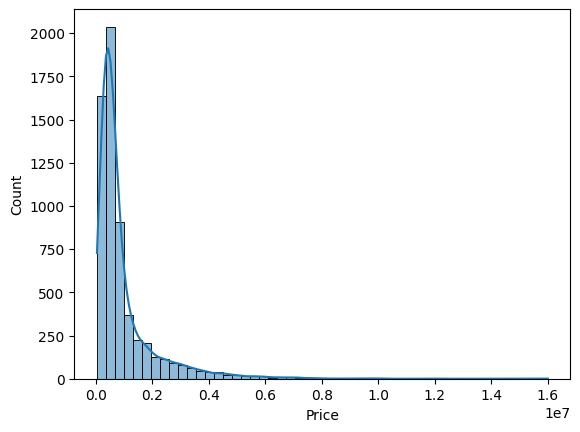

In [50]:
import seaborn as sns
sns.histplot(data['Price'], bins=50, kde=True)


In [371]:
print(data["Price"].max())

16000000


<Axes: xlabel='Price'>

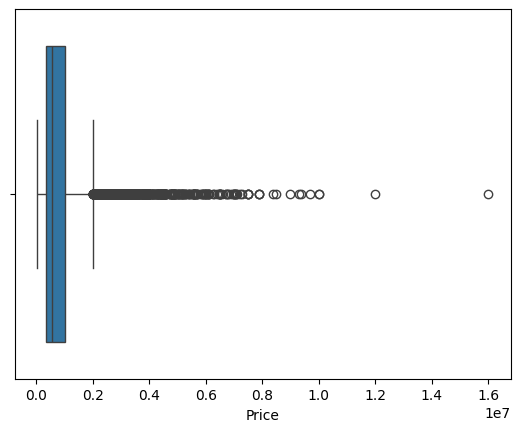

In [372]:
sns.boxplot(x=data['Price'])

In [63]:

Q1 = data['Price'].quantile(0.25)
Q3 = data['Price'].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR

dataset = data[(data['Price'] <= upper_bound)]

In [53]:
dataset.shape

(5393, 7)

<Axes: xlabel='Price'>

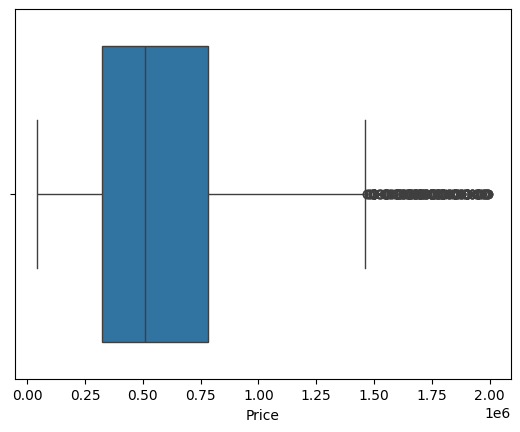

In [375]:
sns.boxplot(x=dataset['Price'])

<Axes: xlabel='Price', ylabel='Count'>

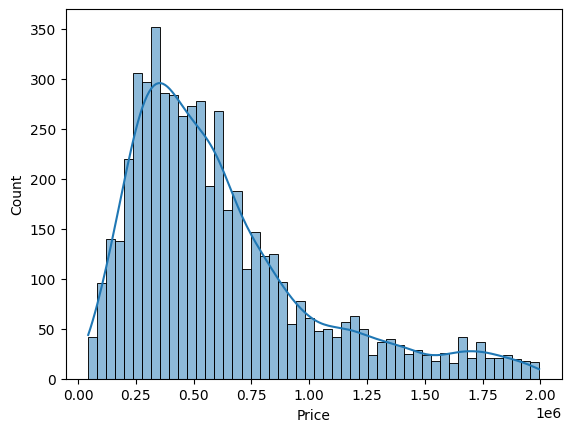

In [376]:
sns.histplot(dataset['Price'], bins=50, kde=True)

<Axes: xlabel='Year', ylabel='Price'>

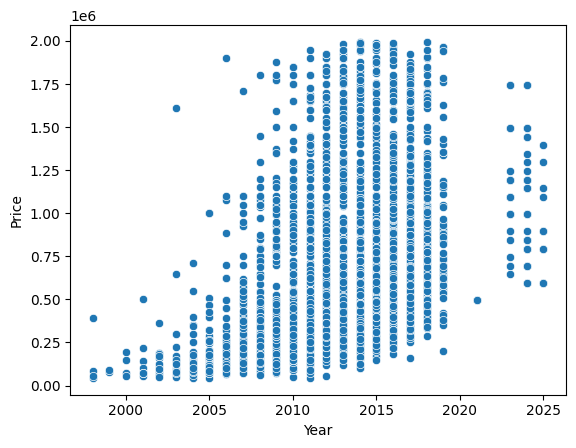

In [377]:
sns.scatterplot(x='Year', y='Price', data=dataset)

<Axes: xlabel='Kilometers_Driven', ylabel='Price'>

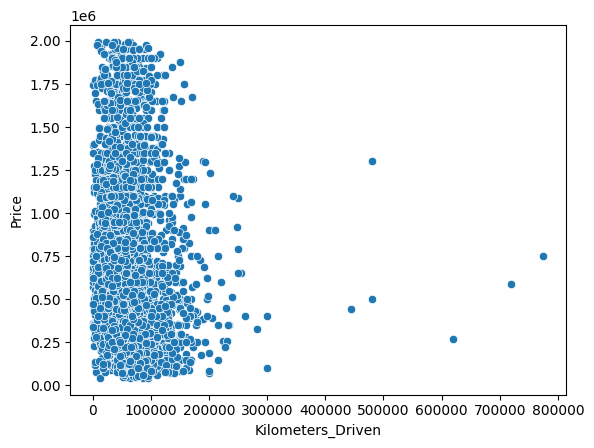

In [378]:
sns.scatterplot(x='Kilometers_Driven', y='Price', data=dataset)

<Axes: xlabel='count', ylabel='Brand'>

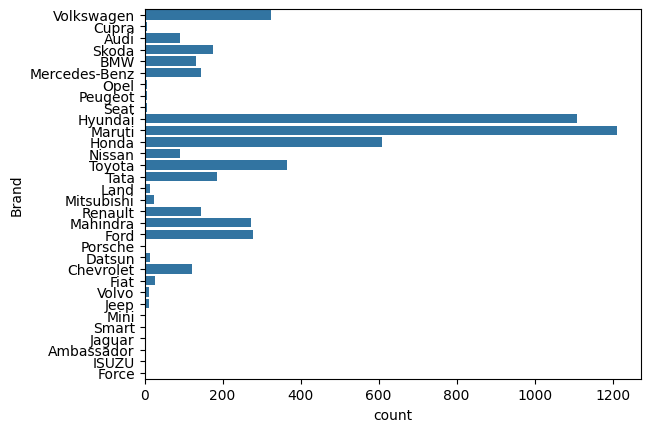

In [379]:
sns.countplot(y='Brand', data=dataset)

<Axes: xlabel='count', ylabel='Fuel_Type'>

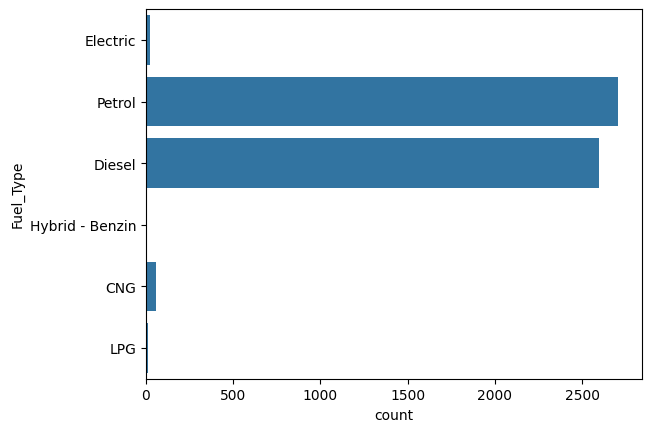

In [380]:
sns.countplot(y='Fuel_Type', data=dataset)

FEATURE ENGINEERING

In [54]:
dataset['Age'] = 2025 - dataset['Year']  
dataset.drop('Year', axis=1, inplace=True)


C:\Users\renuk\AppData\Local\Temp\ipykernel_15824\3763026025.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Age'] = 2025 - dataset['Year']
C:\Users\renuk\AppData\Local\Temp\ipykernel_15824\3763026025.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.drop('Year', axis=1, inplace=True)


ONE HOT ENCODING FOR BRAND,MODEL AND FUELTYPE & APPLIED LOG TRANSFORMATION ON PRICE BECAUSE OF SKEWNESS

In [55]:
import numpy as np

dataset = pd.get_dummies(dataset, columns=['Fuel_Type', 'Brand'], drop_first=True)

dataset['Price'] = np.log1p(dataset['Price'])


In [56]:
dataset.head()

,Model,Kilometers_Driven,Engine,Price,Age,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_Hybrid - Benzin,Fuel_Type_LPG,Fuel_Type_Petrol,...,Brand_Peugeot,Brand_Porsche,Brand_Renault,Brand_Seat,Brand_Skoda,Brand_Smart,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo
0,ID.3,15251,1800,13.810499,1,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,ID.5,13296,2640,14.217637,1,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,ID.4,38337,2640,13.993658,2,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,Born,16119,2040,13.810499,2,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,E-Tron,35279,3600,14.217637,2,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Checking Correlation between Numerical Columns

In [384]:
numeric_df = dataset.select_dtypes(include=['int64', 'float64'])
numeric_df.head()


,Kilometers_Driven,Engine,Price,Age
0,15251,1800,13.810499,1
1,13296,2640,14.217637,1
2,38337,2640,13.993658,2
3,16119,2040,13.810499,2
4,35279,3600,14.217637,2


In [385]:
corr_matrix = numeric_df.corr()
corr_matrix


,Kilometers_Driven,Engine,Price,Age
Kilometers_Driven,1.000000,0.287356,-0.129681,0.444952
Engine,0.287356,1.000000,0.555685,0.158024
Price,-0.129681,0.555685,1.000000,-0.532047
Age,0.444952,0.158024,-0.532047,1.000000


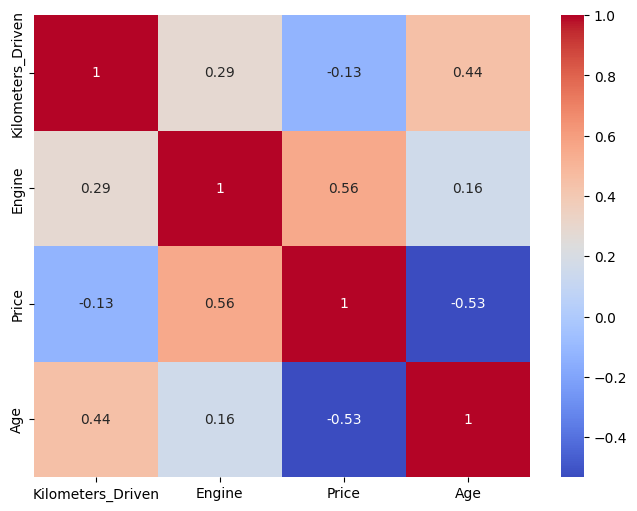

In [386]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


MODEL TRAINING

In [387]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

INPUT SPLIT

In [388]:
X = dataset.drop('Price', axis=1)
y = dataset['Price']

SPLIT THE DATA, FREQUENCY ENCODING FOR MODEL AND STANDARDIZE THE NUMERICAL COLUMNS

In [389]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [390]:
freq = X_train['Model'].value_counts() / len(X_train)

X_train['Model_freq'] = X_train['Model'].map(freq)
X_test['Model_freq'] = X_test['Model'].map(freq)

X_test['Model_freq'] = X_test['Model_freq'].fillna(freq.mean())


In [391]:
X_train = X_train.drop('Model', axis=1)
X_test = X_test.drop('Model', axis=1)

In [392]:
cols = ["Kilometers_Driven","Age","Engine"]

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train[cols])
X_test_scaled = scaler.transform(X_test[cols])

Create a Linear Regression model and perform cross validation

In [393]:
model = LinearRegression()
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
print("Cross-validation R² scores:", scores)
print("Mean R²:", scores.mean())


Cross-validation R² scores: [0.81637387 0.77872892 0.78970272 0.79691945 0.82273709]
Mean R²: 0.8008924115092076


Training the model and make predictions

In [394]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

EVALUATE THE MODEL

In [395]:
r2 = r2_score(y_test, y_pred)
print("R²:", r2)

R²: 0.8300903000384516


In [396]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

RMSE: 0.27946994216604526


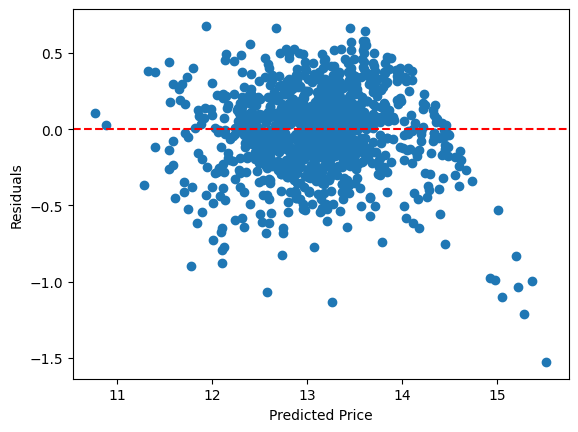

In [399]:
import matplotlib.pyplot as plt

residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.show()


In [402]:
import joblib

joblib.dump(model, "car_price_model.pkl")

joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

In [68]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
import joblib

model = LinearRegression()

numeric_features = ['Year', 'Kilometers_Driven', 'Engine']
categorical_features = ['Brand', 'Model', 'Fuel_Type']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model)  # your trained regression model
])

X = dataset[['Year', 'Kilometers_Driven', 'Engine', 'Brand', 'Model', 'Fuel_Type']]
y = dataset['Price']

pipeline.fit(X, y)


# Save pipeline
joblib.dump(pipeline, "car_price_pipeline.pkl")

['car_price_pipeline.pkl']